In [1]:
!pip install labelme

     ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
      --------------------------------------- 0.0/1.4 MB 262.6 kB/s eta 0:00:06
     - -------------------------------------- 0.1/1.4 MB 469.7 kB/s eta 0:00:03
     -------- ------------------------------- 0.3/1.4 MB 1.6 MB/s eta 0:00:01
     ---------------------- ----------------- 0.8/1.4 MB 3.6 MB/s eta 0:00:01
     --------------------------- ------------ 1.0/1.4 MB 3.7 MB/s eta 0:00:01
     -------------------------------- ------- 1.2/1.4 MB 3.7 MB/s eta 0:00:01
     --------------------------------- ------ 1.2/1.4 MB 3.8 MB/s eta 0:00:01
     ---------------------------------------- 1.4/1.4 MB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/7.7 MB ? eta -:--:--
     -- ------------------------------------- 0.6/7.7 MB 

In [ ]:
import tensorflow as tf
tf.config.list_physical_devices("GPU")

tf.test.is_gpu_available()

In [3]:
import os
import time
import uuid #unique uniform identity
import cv2 

In [10]:
IMAGES_PATH = os.path.join('data','images')
number_images = 30

In [16]:
cap = cv2.VideoCapture(0)
for imgnum in range(number_images):
     print('collecting images{}'.format(imgnum))
     ret, frame = cap.read()
     imgname = os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')
     cv2.imwrite(imgname, frame)
     cv2.imshow('frame',frame)
     time.sleep(0.5)

     if cv2.waitKey(1) & 0xFF == ord('q'):
         break
cap.release()
cv2.destroyAllWindows()

collecting images0
collecting images1
collecting images2
collecting images3
collecting images4
collecting images5
collecting images6
collecting images7
collecting images8
collecting images9
collecting images10
collecting images11
collecting images12
collecting images13
collecting images14
collecting images15
collecting images16
collecting images17
collecting images18
collecting images19
collecting images20
collecting images21
collecting images22
collecting images23
collecting images24
collecting images25
collecting images26
collecting images27
collecting images28
collecting images29


In [3]:
import tensorflow as tf
gpus = tf.config.list_physical_devices("GPU")
if gpus:
    for gpu in gpus:
        print("found the GPU with name",gpu)
else:
    print("failed")

found the GPU with name PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [20]:
!labelme

2024-07-13 22:27:57,587 [INFO   ] __init__:get_config:67- Loading config file from: C:\Users\jaiva\.labelmerc


In [31]:
!pip install albumentations

  Using cached albumentations-1.4.11-py3-none-any.whl.metadata (39 kB)
  Using cached pydantic-2.8.2-py3-none-any.whl.metadata (125 kB)
  Using cached albucore-0.0.12-py3-none-any.whl.metadata (3.1 kB)
  Using cached eval_type_backport-0.2.0-py3-none-any.whl.metadata (2.2 kB)
Using cached albumentations-1.4.11-py3-none-any.whl (165 kB)
Using cached albucore-0.0.12-py3-none-any.whl (8.4 kB)
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/38.8 MB 2.6 MB/s eta 0:00:15
    --------------------------------------- 0.6/38.8 MB 8.1 MB/s eta 0:00:05
    --------------------------------------- 0.8/38.8 MB 6.7 MB/s eta 0:00:06
   - -------------------------------------- 1.0/38.8 MB 5.9 MB/s eta 0:00:07
   - -------------------------------------- 1.1/38.8 MB 5.8 MB/s eta 0:00:07
   - -------------------------------------- 1.1/38.8 MB 5.8 MB/s eta 0:00:07
   - -------------------------------------- 1.1/38.8 MB 5.8 MB/s eta 0:00:0

In [5]:
import tensorflow as tf 
import json
import numpy as np
from matplotlib import pyplot as plt


In [6]:
#avoid OOm error by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [6]:
tf.keras.backend.clear_session()

def set_session(gpus: int = 0):
    num_cores = cpu_count()

    config = tf.ConfigProto(
        intra_op_parallelism_threads=num_cores,
        inter_op_parallelism_threads=num_cores,
        allow_soft_placement=True,
        device_count={"CPU": 1, "GPU": gpus},
    )

    session = tf.Session(config=config)
    k.set_session(session)


In [35]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [39]:
images = tf.data.Dataset.list_files('data\\images\\*jpg',shuffle=False)

InvalidArgumentError: Expected 'tf.Tensor(False, shape=(), dtype=bool)' to be true. Summarized data: b'No files matched pattern: data\\images\\*jpg'

In [5]:
images.as_numpy_iterator().next()

NameError: name 'image' is not defined

In [40]:
def load_image(x):
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [42]:
images = images.map(load_image)

NameError: name 'images' is not defined

In [361]:
images.as_numpy_iterator().next()

NameError: name 'images' is not defined

In [ ]:
type(images)

In [ ]:
image_generator = images.batch(4).as_numpy_iterator()

In [ ]:
plot_images = image_generator.next()

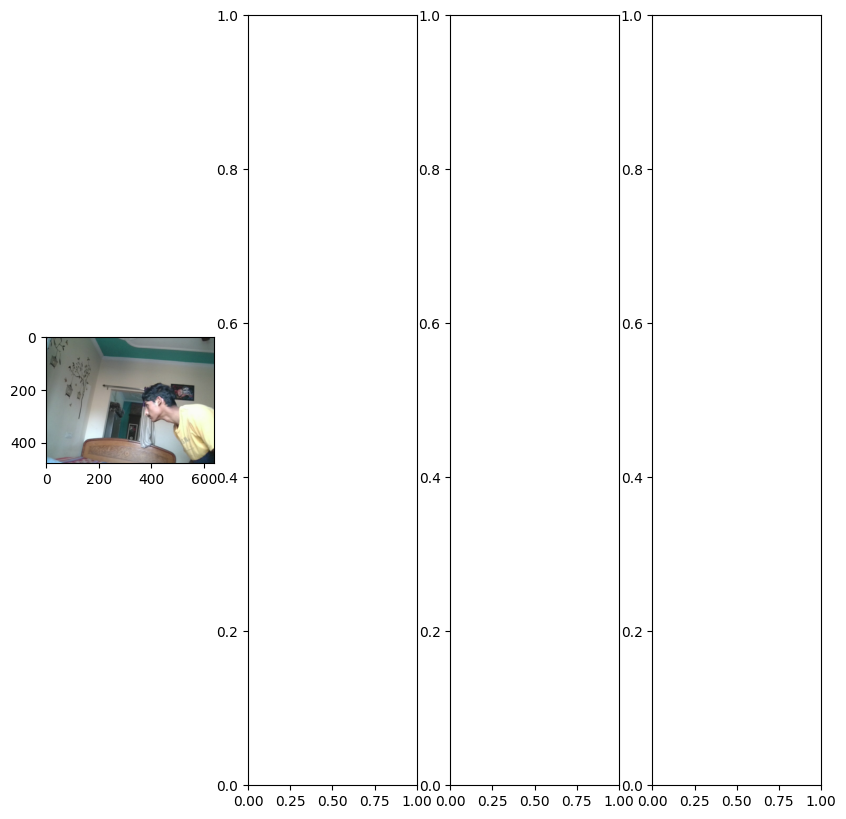

In [43]:
fig, ax = plt.subplots(ncols=4, figsize=(10,10))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image)
plt.show()    

In [44]:
#manually spliting data into train and test validate

In [45]:
90*.7 #63 to train

62.99999999999999

In [48]:
90*.15 # 14 and 13 to test and val

13.5

In [49]:
#move The Matching Lables
for folder in['train','test','val']:
    for file in os.listdir(os.path.join('data', folder, 'images')):

        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('data','labels', filename)
        if os.path.exists(existing_filepath):
            new_filepath = os.path.join('data',folder,'labels',filename)
            os.replace(existing_filepath, new_filepath)
    
                           

In [88]:
#img = cv2.imread(os.path.join('data','val','images','324ada1e-40e2-11ef-9253-f46add5887fa - Copy.jpg'))

In [99]:
#img.shape

In [11]:
#4.Applying Image Augmentation
#4.1 setuping Albumentations Transform Pipeline
import albumentations as alb

In [12]:
augmentor = alb.Compose([alb.RandomCrop(width=450, height=450),
                         alb.HorizontalFlip(p=0.5),
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2),
                         alb.RGBShift(p=0.2),
                         alb.VerticalFlip(p=0.5)],
                        bbox_params=alb.BboxParams(format='albumentations',label_fields=['class_labels']))

In [15]:
img = cv2.imread(os.path.join('data','train','images','2ff478da-40e2-11ef-b65f-f46add5887fa.jpg'))

In [17]:
img.shape

(480, 640, 3)

In [19]:
import json
with open(os.path.join('data','train','labels','2ff478da-40e2-11ef-b65f-f46add5887fa.json'),'r') as f:
     label = json.load(f)

In [21]:
label

{'version': '5.5.0',
 'flags': {},
 'shapes': [{'label': 'face',
   'points': [[231.42857142857142, 90.00000000000003],
    [424.2857142857142, 360.0]],
   'group_id': None,
   'description': '',
   'shape_type': 'rectangle',
   'flags': {},
   'mask': None}],
 'imagePath': '..\\images\\2ff478da-40e2-11ef-b65f-f46add5887fa.jpg',
 'imageData': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAHgAoADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8R

In [23]:
label['shapes'][0]['points']

[[231.42857142857142, 90.00000000000003], [424.2857142857142, 360.0]]

In [25]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [27]:
coords

[231.42857142857142, 90.00000000000003, 424.2857142857142, 360.0]

In [29]:
img.shape

(480, 640, 3)

In [31]:
import numpy as np
coords = list(np.divide(coords, [640,480,640,480]))

In [23]:
coords

[0.36160714285714285, 0.18750000000000006, 0.6629464285714285, 0.75]

In [33]:
augmented = augmentor(image = img, bboxes=[coords], class_labels=['face'])

In [25]:
augmented

{'image': array([[[153, 160, 187],
         [153, 160, 185],
         [150, 157, 182],
         ...,
         [247, 252, 251],
         [247, 252, 251],
         [247, 252, 251]],
 
        [[152, 161, 188],
         [151, 161, 185],
         [148, 158, 182],
         ...,
         [247, 252, 251],
         [247, 252, 251],
         [247, 252, 251]],
 
        [[158, 165, 192],
         [159, 169, 193],
         [161, 171, 195],
         ...,
         [247, 252, 251],
         [247, 252, 251],
         [247, 252, 251]],
 
        ...,
 
        [[169, 168, 178],
         [169, 168, 177],
         [170, 169, 178],
         ...,
         [251, 249, 249],
         [250, 248, 248],
         [250, 247, 249]],
 
        [[167, 166, 175],
         [167, 166, 175],
         [169, 168, 177],
         ...,
         [250, 248, 248],
         [250, 248, 248],
         [250, 248, 248]],
 
        [[168, 167, 176],
         [169, 168, 177],
         [170, 169, 178],
         ...,
         [250, 248,

In [22]:
augmented['image'].shape

(450, 450, 3)

In [83]:
augmented['bboxes']
augmented['image']

array([[[154, 153, 148],
        [151, 150, 145],
        [154, 153, 148],
        ...,
        [ 37,  43,  43],
        [ 34,  40,  40],
        [ 31,  37,  37]],

       [[155, 153, 147],
        [152, 150, 144],
        [154, 154, 147],
        ...,
        [ 39,  43,  43],
        [ 37,  41,  41],
        [ 36,  40,  40]],

       [[156, 154, 148],
        [154, 152, 146],
        [154, 154, 147],
        ...,
        [ 37,  41,  41],
        [ 35,  39,  39],
        [ 37,  38,  39]],

       ...,

       [[171, 162, 157],
        [173, 163, 158],
        [170, 161, 156],
        ...,
        [166, 159, 161],
        [167, 161, 161],
        [169, 163, 163]],

       [[174, 164, 159],
        [174, 164, 159],
        [173, 163, 158],
        ...,
        [170, 163, 165],
        [171, 165, 165],
        [174, 168, 168]],

       [[177, 168, 160],
        [176, 167, 159],
        [179, 167, 160],
        ...,
        [165, 158, 160],
        [165, 158, 160],
        [166, 159, 161]]

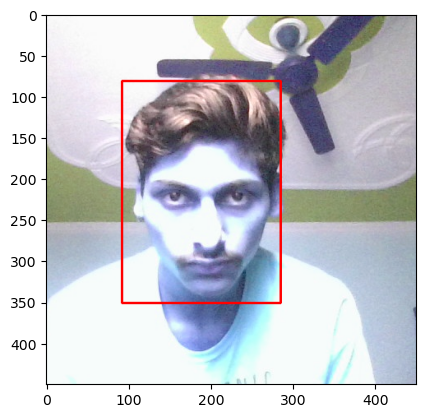

In [25]:
cv2.rectangle(augmented['image'],
              tuple(np.multiply(augmented['bboxes'][0][:2],[450,450]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:],[450,450]).astype(int)),
                       (255,0,0),2)
plt.imshow(augmented['image'])

              

In [107]:
#building and Run Augmented pipeline
for partition in ['train','test','val']:
    for image in os.listdir(os.path.join('data',partition,'images')):
        img = cv2.imread(os.path.join('data',partition,'images',image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('data',partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)
                
            coords = [0,0,0,0]
            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords,[640,480,640,480]))

        try:
            for x in range(60):
               augmented = augmentor(image = img, bboxes=[coords], class_labels=['face'])
               cv2.imwrite(os.path.join('aug_data',partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

               annotation = {}
               annotation['image'] = image

               if os.path.exists(label_path):
                   if len(augmented['bboxes']) == 0:
                       annotation['bbox'] = [0,0,0,0]
                       annotation['class'] = 0
                   else:
                       annotation['bbox'] = augmented['bboxes'][0]
                       annotation['class'] = 1
               else:
                   annotation['bbox'] = [0,0,0,0]
                   annotation['class'] = 0

               with open(os.path.join('aug_data', partition, 'labels',f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                   json.dump(annotation, f)

        except Exception as e:
            print(e)
               
                   

In [35]:
#5.2 LOAD AUGMENTED IMAGES TO TENSORFLOW DATASET

In [44]:
train_images = tf.data.Dataset.list_files('aug_data\\train\\images\\*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

In [46]:
test_images = tf.data.Dataset.list_files('aug_data\\test\\images\\*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [48]:
val_images = tf.data.Dataset.list_files('aug_data\\val\\images\\*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [50]:
train_images.as_numpy_iterator().next()

array([[[0.9981618 , 0.9658088 , 0.90367645],
        [0.98265934, 0.9862745 , 0.925     ],
        [0.9903799 , 0.9903799 , 0.9501838 ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[0.9901348 , 0.95686275, 0.8890319 ],
        [0.9827819 , 0.9871324 , 0.9175858 ],
        [0.9961397 , 0.9965686 , 0.9481618 ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[0.9873162 , 0.93192405, 0.8686887 ],
        [0.99558824, 1.        , 0.922549  ],
        [0.99552697, 1.        , 0.940625  ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[0.9970588 , 0.9998162 , 0.9916667 ],
        [0.99307597, 0.99307597, 0.99307597],
        [0.9990196 , 0

In [52]:
# 6. Prepare Lables
#6.1 Build Label Loading Function

In [54]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)

    return [label['class']], label['bbox']

In [56]:
#6.2 Load Labels to Tensorflow dataset

In [58]:
train_labels = tf.data.Dataset.list_files('aug_data\\train\\labels\\*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [60]:
test_labels = tf.data.Dataset.list_files('aug_data\\test\\labels\\*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [62]:
val_labels = tf.data.Dataset.list_files('aug_data\\val\\labels\\*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [64]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.3972, 0.2089, 0.8257, 0.809 ], dtype=float16))

In [66]:
#7. Combine Labels and Images Samples

In [68]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(3780, 3780, 840, 840, 840, 840)

In [70]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)


In [72]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)


In [74]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

In [76]:
#7.3 VIEW Images and Annotation

In [78]:
train.as_numpy_iterator().next()[1]

(array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=uint8),
 array([[0.81   , 0.3591 , 1.     , 0.7114 ],
        [0.4082 , 0.10443, 0.7812 , 0.605  ],
        [0.488  , 0.4956 , 0.7725 , 0.851  ],
        [0.3044 , 0.504  , 0.577  , 0.8384 ],
        [0.6963 , 0.1681 , 0.9688 , 0.503  ],
        [0.2725 , 0.3967 , 0.463  , 0.6094 ],
        [0.36   , 0.1984 , 0.738  , 0.7065 ],
        [0.4214 , 0.3362 , 0.653  , 0.6562 ]], dtype=float16))

In [79]:
data_samples = train.as_numpy_iterator()

In [80]:
res = data_samples.next()

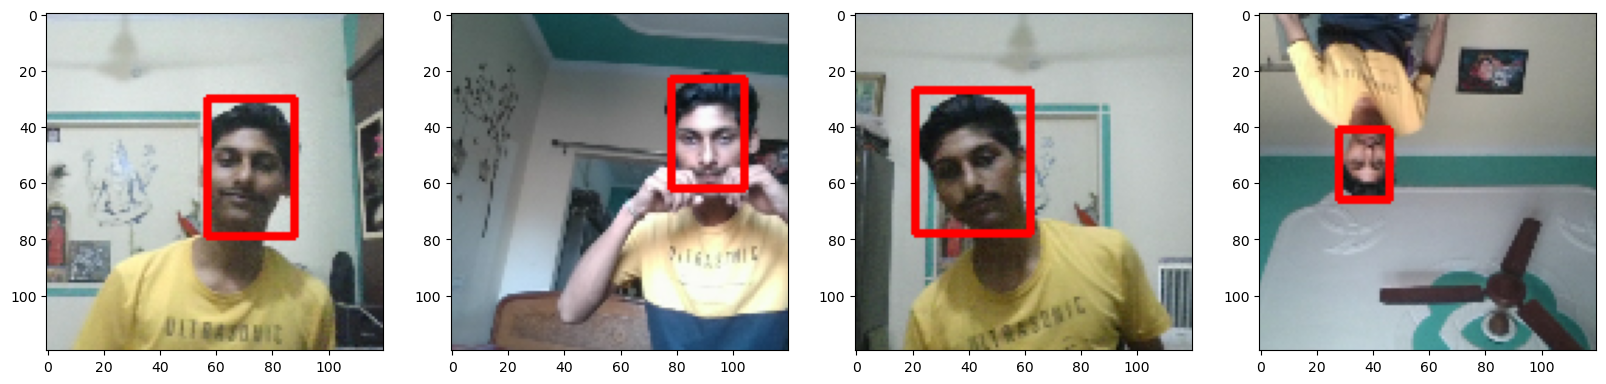

In [81]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4):
    sample_image = res[0][idx].copy()
    sample_coords = res[1][1][idx]

    cv2.rectangle(sample_image,
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)),
                        (255,0,0), 2)
    ax[idx].imshow(sample_image)

plt.show()

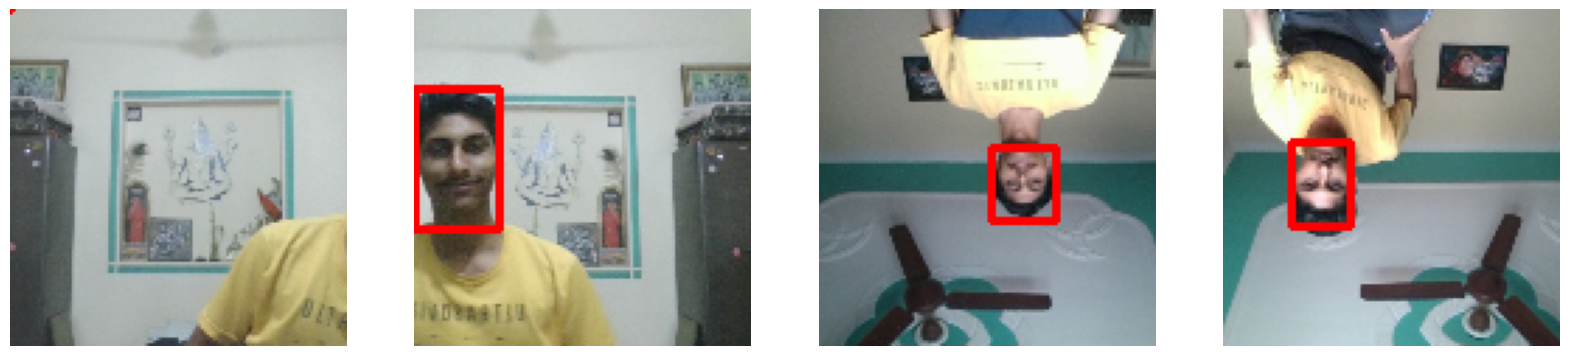

In [44]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Assuming res is a list of results where res[0] contains images and res[1] contains coordinates
# Example structure: res = [list_of_images, [list_of_image_metadata, list_of_coordinates]]

# Create a figure with 4 subplots (1 row, 4 columns) and set the figure size
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))

# Loop through the first 4 images
for idx in range(4):
    # Extract a sample image and its corresponding coordinates
    sample_image = res[0][idx].copy()  # Make a writable copy of the image
    sample_coords = res[1][1][idx]

    # Draw a rectangle on the sample image using the coordinates
    # The coordinates are multiplied by [120, 120] to scale them appropriately
    # The color of the rectangle is set to blue (BGR: 255, 0, 0) and the thickness is set to 2
    cv2.rectangle(
        sample_image,
        tuple(np.multiply(sample_coords[:2], [120, 120]).astype(int)),  # Top-left corner
        tuple(np.multiply(sample_coords[2:], [120, 120]).astype(int)),  # Bottom-right corner
        (255, 0, 0),  # Color of the rectangle (blue)
        2  # Thickness of the rectangle
    )

    # Display the sample image with the rectangle in the subplot
    ax[idx].imshow(sample_image)  # Convert BGR to RGB for correct color display
    ax[idx].axis('off')  # Hide axis

# Show the plot
plt.show()


In [45]:
#8. Building Deep Learmimg Using the Functional API
#8.1 import Layers and Base Network

In [46]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers  import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

In [47]:
vgg = VGG16(include_top = False)

In [71]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [72]:
#8.3 Building instance of Network

In [83]:
def build_model():
    input_layer = Input(shape=(120,120,3))

    vgg = VGG16(include_top=False)(input_layer)
    #classification model
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)
    #regression model   Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)

    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker
    

In [84]:
train.as_numpy_iterator().next()[1]

(array([[1],
        [1],
        [0],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=uint8),
 array([[0.04602, 0.2842 , 0.3413 , 0.6367 ],
        [0.2407 , 0.4675 , 0.537  , 0.7847 ],
        [0.     , 0.     , 0.     , 0.     ],
        [0.6274 , 0.4468 , 0.7812 , 0.642  ],
        [0.2957 , 0.4534 , 0.4912 , 0.6963 ],
        [0.     , 0.1748 , 0.2074 , 0.539  ],
        [0.5312 , 0.2491 , 0.9087 , 0.7573 ],
        [0.2214 , 0.3481 , 0.5176 , 0.683  ]], dtype=float16))

In [85]:
#8.4 TEST NEURAL NETWORK

In [86]:
facetracker = build_model()

NameError: name 'Input' is not defined

In [ ]:
facetracker.summary()

In [ ]:
X, y = train.as_numpy_iterator().next()

In [ ]:
y

In [ ]:
X.shape

In [ ]:
classes, coords = facetracker.predict(X)

In [ ]:
classes, coords

In [ ]:
#9.DEFINNING LOSSES
#9.1 Define OPTIMIZER and LR

In [ ]:
len(train)

In [ ]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch

In [ ]:
lr_decay

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001, decay=lr_decay)

In [ ]:
#9.2 Create Localization loss and Classification Loss

In [ ]:
def localization_loss(y_true, yhat):
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))

    h_true = y_true[:,3] - y_true[:,1]
    w_true = y_true[:,2] - y_true[:,0]

    h_pred = yhat[:,3] - yhat[:,1]
    w_pred = yhat[:,2] - yhat[:,0]

    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true - h_pred))

    return delta_coord + delta_size

In [ ]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

In [ ]:
#9.3 Test out Loss Metrics

In [ ]:
localization_loss(y[1], coords)

In [ ]:
classloss(y[0], classes)

In [ ]:
regressloss(y[1], coords)

In [ ]:
#10. TRAIN OUR NEURAL NETWORK
#10.1 Create custom Model

In [ ]:
class FaceTracker(Model):
    def __init__(self, eyetracker,  **kwargs):
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt

    def train_step(self, batch, **kwargs):

        X, y = batch

        with tf.GradientTape() as tape:
            classes, coords = self.model(X, training=True)

            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss+0.5*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)

            opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
            return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}

    def test_step(self, batch, **kwargs):
         X, y = batch
         
         classes, coords = self.model(X, training=False)
         
         batch_classloss = self.closs(y[0], classes)
         batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
         total_loss = batch_localizationloss+0.5*batch_classloss
         
         return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}

    def call(self, X, **kwargs):
        return self.model(X, **kwargs)
         

In [181]:
model  = FaceTracker(facetracker)

In [182]:
model.compile(opt, classloss, regressloss)

In [184]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [185]:
hist = model.fit(train, epochs=40, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/40
473/473 [==============================] - 189s 245ms/step - total_loss: 0.1145 - class_loss: 0.0258 - regress_loss: 0.1016 - val_total_loss: 0.0435 - val_class_loss: 8.7789e-05 - val_regress_loss: 0.0434
Epoch 2/40
473/473 [==============================] - 142s 215ms/step - total_loss: 0.0221 - class_loss: 0.0052 - regress_loss: 0.0195 - val_total_loss: 0.0508 - val_class_loss: 0.0011 - val_regress_loss: 0.0503
Epoch 3/40
473/473 [==============================] - 119s 195ms/step - total_loss: 0.0122 - class_loss: 0.0031 - regress_loss: 0.0106 - val_total_loss: 0.0294 - val_class_loss: 0.0023 - val_regress_loss: 0.0282
Epoch 4/40
473/473 [==============================] - 126s 205ms/step - total_loss: 0.0131 - class_loss: 0.0040 - regress_loss: 0.0111 - val_total_loss: 0.0500 - val_class_loss: 5.9995e-05 - val_regress_loss: 0.0500
Epoch 5/40
473/473 [==============================] - 130s 219ms/step - total_loss: 0.0085 - class_loss: 0.0026 - regress_loss: 0.0072 - val_tot

In [183]:
#10.2 train
logdir='logs'

<function matplotlib.pyplot.show(close=None, block=None)>

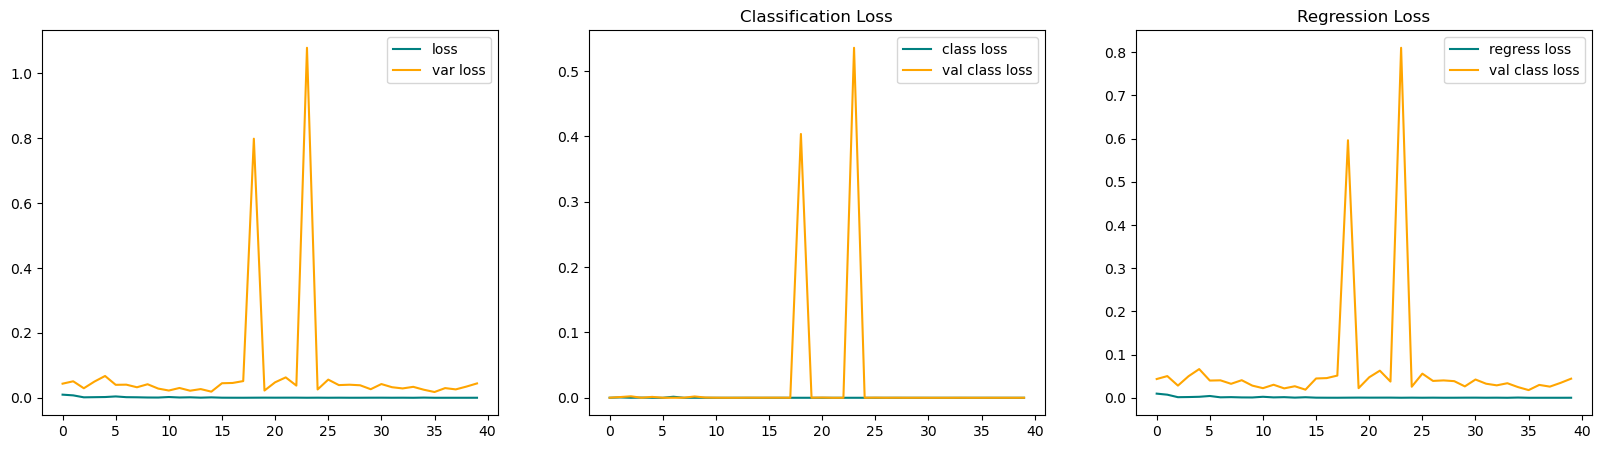

In [186]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='var loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val class loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show

In [86]:
#11.1 make predection
test_data =test.as_numpy_iterator()

In [187]:
test_sample = test_data.next()

In [188]:
yhat = facetracker.predict(test_sample[0])

1/1 [==============================] - 0s 56ms/step


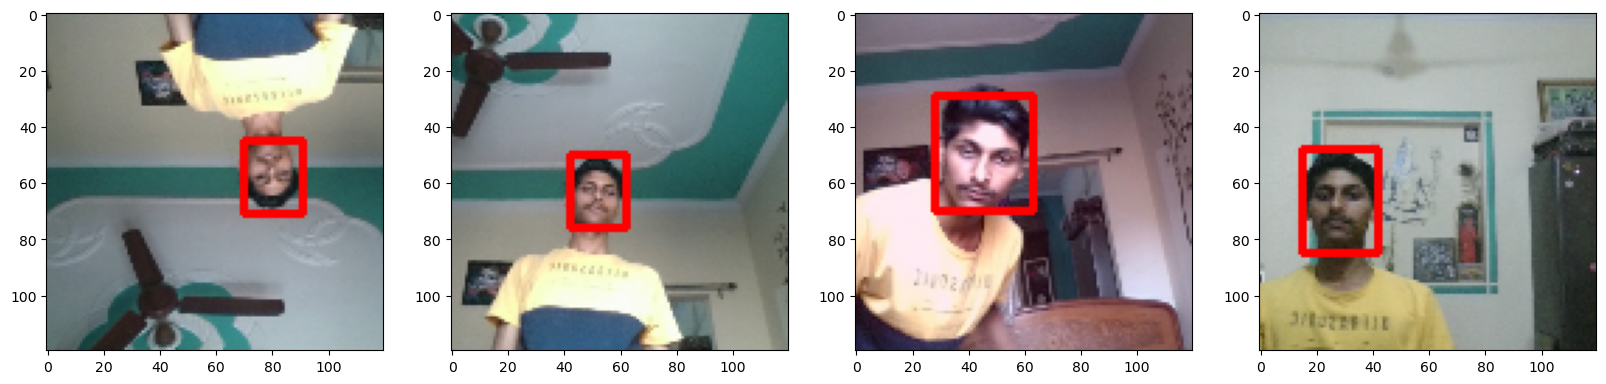

In [189]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4):
    sample_image = test_sample[0][idx].copy()
    sample_coords = yhat[1][idx]

    if yhat[0][idx] > 0.5:
        cv2.rectangle(sample_image,
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)),
                        (255,0,0), 2)
        ax[idx].imshow(sample_image)
                      

In [190]:
#11.2 save the Model

In [191]:
from tensorflow.keras.models import load_model

In [192]:
facetracker.save('facetracker.h5')

In [193]:
facetracker = load_model('facetracker.h5')

In [194]:
#REALTIME FACE DETECTION

cap = cv2.VideoCapture(0)
while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[50:500, 50:500,:]
    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))
    
    yhat = facetracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]
    
    if yhat[0] > 0.5:
        #controlls the main rectangle
        alpha = 0.5
        cv2.rectangle(frame,
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)),
                            (165,0,255), 2)
        #controls the lable rectange

       # cv2.rectangle(frame,
          #            tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
         #                         [0,-30])),
         #             tuple(np.add(np.multiply(sample_coords[2:], [450,450]).astype(int),
         #                         [80,-250])),
         #                   (255,0,0), -1)
        #control the text rended
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),
                   cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
        cv2.imshow('EyeTracker', frame)
        
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()
            
            

1/1 [==============================] - 0s 23ms/step
